In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
path = 'data/'

In [40]:
df = pd.read_csv(path +'adjust_sample_data.csv')
print(len(df))
df['installed_at'] = pd.to_datetime(df['installed_at'])

df['created_at'] = pd.to_datetime(df['created_at'])
df.sort_values(by='created_at',inplace=True)

df['aqz_age'] = df['created_at'] - df['installed_at']
df['aqz_age_day'] = df['aqz_age'].dt.days
df['aqz_cohort_day'] = df['installed_at'].dt.date
print(df.head())


770529
                                    adid          network_name installed_at  \
330282  ceb1dc78642e0e3beae1da232ba381e5               Tapsell   2019-07-06   
417329  de17aa4433493e33289898a79e3afe44   Cafebazaar-searchad   2019-07-06   
765245  ce0a745c03570c47c54cfd5119bcdd62  Adwords UAC Installs   2019-07-06   
765246  7abd8db8991283ac09a2f10da9238826  Adwords UAC Installs   2019-07-06   
72358   105ad0d0c7c2d5ca4f6cf147452787bc               Organic   2019-07-06   

       activity_kind event_name created_at aqz_age  aqz_age_day aqz_cohort_day  
330282       install        NaN 2019-07-06  0 days            0     2019-07-06  
417329       install        NaN 2019-07-06  0 days            0     2019-07-06  
765245       install        NaN 2019-07-06  0 days            0     2019-07-06  
765246       install        NaN 2019-07-06  0 days            0     2019-07-06  
72358        install        NaN 2019-07-06  0 days            0     2019-07-06  


In [41]:
#df_users = df[df['activity_kind'] == 'install']
df_users = df.drop_duplicates('adid', keep='first')
#df_users.drop_duplicates('adid',inplace=True)
df_users = df_users[['adid','network_name','installed_at']]
df_users.set_index('adid',drop=True,inplace=True)

In [42]:
df=df[df['activity_kind']=='event']
df_conversion = df.drop_duplicates('adid',keep='first')
df_conversion.set_index('adid',drop=True,inplace=True)
df.set_index('adid',drop=True,inplace=True)
df['cnv_date'] = df_conversion['created_at']
df['cnv_cohort_day'] = df['cnv_date'].dt.date
df['cnv_age'] = df['created_at'] - df['cnv_date']
df['cnv_age_day'] = df['cnv_age'].dt.days

In [44]:
df['installed_at'] = pd.to_datetime(df['installed_at'])
df['created_at'] = pd.to_datetime(df['created_at'])
df['aqz_cohort_day'] = pd.to_datetime(df['aqz_cohort_day'])
df['cnv_date'] = pd.to_datetime(df['cnv_date'])
df['cnv_cohort_day'] = pd.to_datetime(df['cnv_cohort_day'])
df['aqz_age'] = pd.to_timedelta(df['aqz_age'])
df['cnv_age'] = pd.to_timedelta(df['cnv_age'])
df.sort_values('created_at',inplace=True)


df_users['installed_at'] = pd.to_datetime(df_users['installed_at'])
df_users.sort_values('installed_at',inplace=True)
print("cb load passed!")

cb load passed!


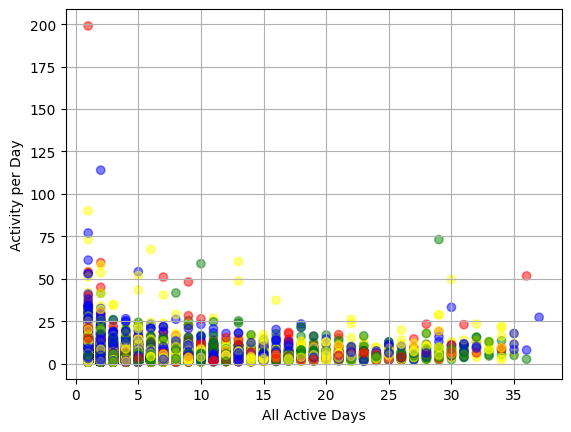

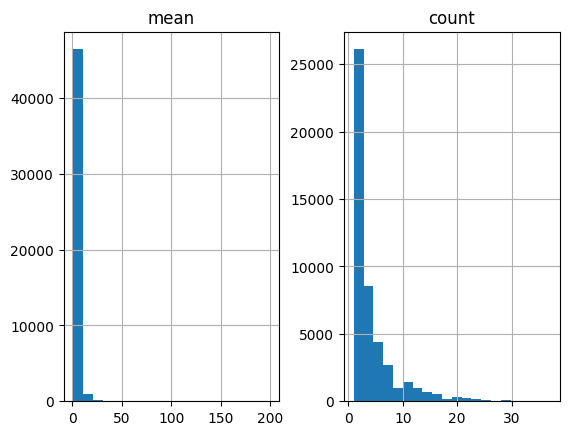

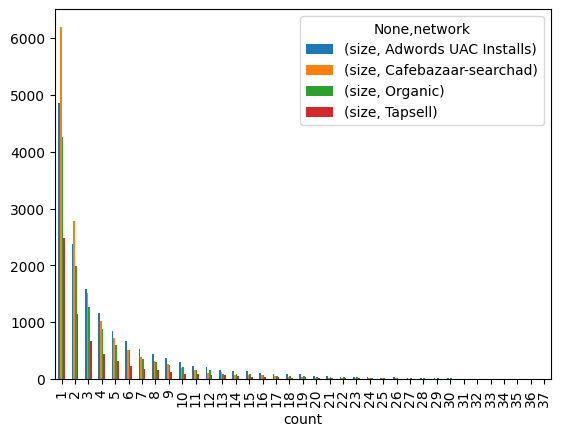

In [46]:
df = df.reset_index()
df_vis = df.groupby(['adid', 'cnv_age_day'])['adid'].agg(['size']).unstack()

# sca['mean'] = np.log10(sca.mean(axis=1))
sca = pd.DataFrame(columns=['count','mean'])
sca['count'] = df_vis.count(axis=1)
sca['mean'] = df_vis.mean(axis=1)

color = {'Tapsell': 'red',
         'Organic': 'green',
         'Cafebazaar-searchad': 'blue',
         'Adwords UAC Installs': 'yellow'}
sca['network'] = df_users['network_name']
sca['color'] = sca['network'].replace(color)

plt.scatter(y=sca['mean'], x=sca['count'], c=sca['color'], alpha=.5)
plt.xlabel('All Active Days')
plt.ylabel('Activity per Day')
#ax.spines['top'].set_visible(False)
#ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)

#plt.legend([ax],['Tapsell','Organic','Cafebazaar-searchad','Adwords UAC Installs'])
plt.grid()
# plt.savefig(path+'output/user_activity_scatter',dpi=300)
plt.show()

sca[['mean','count']].hist(bins=20)
plt.show()

g = sca.groupby(['count','network'])['count'].agg(['size']).unstack()
g.plot(kind='bar')
plt.show()

In [53]:

df['cnv_date'] = df['cnv_date'].dt.date
df['week'] = df['cnv_date'].dt.week
stickiness = df.groupby(['cnv_date','network_name','adid'])['adid'].agg(['size'])
stickiness = stickiness.unstack().count(axis=1)
stickiness = stickiness.unstack()
mean = stickiness.mean(axis=0)

network_all = cb.drop_duplicates('adid').groupby(['network_name'])['adid'].size()
print(network_all)
sti = 100 * mean / network_all
print(sti)


AttributeError: Can only use .dt accessor with datetimelike values

/var/folders/c_/63blzrp52pdbnhwcy0m04dhh0000gp/T/ipykernel_2053/3564811985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['cnv_date'] = df_conversion['created_at']
/var/folders/c_/63blzrp52pdbnhwcy0m04dhh0000gp/T/ipykernel_2053/3564811985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events['cnv_cohort_day'] = df_events['cnv_date'].dt.date
/var/folders/c_/63blzrp52pdbnhwcy0m04dhh0000gp/T/ipykernel_2053/3564811985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [11]:

df_events.sort_values('created_at',inplace=True)
df_users.sort_values('installed_at',inplace=True)
df_events.reset_index(inplace=True)
df_events

/var/folders/c_/63blzrp52pdbnhwcy0m04dhh0000gp/T/ipykernel_2053/695369400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_events.sort_values('created_at',inplace=True)


,adid,network_name,installed_at,activity_kind,event_name,created_at,aqz_age,aqz_age_day,aqz_cohort_day,cnv_date,cnv_cohort_day,cnv_age,cnv_age_day
0,7394de2fb8834e5c63d71c4d4c9b46f5,Tapsell,2019-07-06 00:04:00,event,get_contact,2019-07-06 00:06:00,0 days 00:02:00,0,2019-07-06,2019-07-16 20:11:00,2019-07-16,-11 days +03:55:00,-11
1,1dcedd19b197650bd08a1f521caa3f8b,Organic,2019-07-06 00:07:00,event,get_contact,2019-07-06 00:07:00,0 days 00:00:00,0,2019-07-06,2019-07-10 13:19:00,2019-07-10,-5 days +10:48:00,-5
2,00c033d8dd71d59a80ec5e7b92945115,Tapsell,2019-07-06 00:06:00,event,get_contact,2019-07-06 00:12:00,0 days 00:06:00,0,2019-07-06,2019-07-23 09:29:00,2019-07-23,-18 days +14:43:00,-18
3,00c033d8dd71d59a80ec5e7b92945115,Tapsell,2019-07-06 00:06:00,event,get_contact,2019-07-06 00:15:00,0 days 00:09:00,0,2019-07-06,2019-07-23 09:29:00,2019-07-23,-18 days +14:46:00,-18
4,af07384644835b71790b03e08c8dc1d0,Cafebazaar-searchad,2019-07-06 00:18:00,event,get_contact,2019-07-06 00:20:00,0 days 00:02:00,0,2019-07-06,2019-07-06 00:20:00,2019-07-06,0 days 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
681142,a92b1dbbf2b592900547111b0ceea353,Cafebazaar-searchad,2019-07-07 08:56:00,event,get_contact,2019-08-11 19:28:00,35 days 10:32:00,35,2019-07-07,2019-07-26 18:53:00,2019-07-26,16 days 00:35:00,16
681143,327f4f7a24f1832d84d974399f904755,Organic,2019-07-09 07:28:00,event,get_contact,2019-08-11 19:28:00,33 days 12:00:00,33,2019-07-09,2019-07-18 18:28:00,2019-07-18,24 days 01:00:00,24
681144,5e67a9c931fce81c928abcc28228a40a,Cafebazaar-searchad,2019-07-06 07:40:00,event,get_contact,2019-08-11 19:28:00,36 days 11:48:00,36,2019-07-06,2019-07-10 18:12:00,2019-07-10,32 days 01:16:00,32
681145,4d370c12f1c4f156241d4c491c4d8688,Adwords UAC Installs,2019-07-08 12:16:00,event,get_contact,2019-08-11 19:28:00,34 days 07:12:00,34,2019-07-08,2019-07-25 15:01:00,2019-07-25,17 days 04:27:00,17


Adwords UAC Installs
Adwords UAC Installs 7208.0 0
Cafebazaar-searchad
Cafebazaar-searchad 7282.5 1
Organic
Organic 5717.5 2
Tapsell
Tapsell 3111.0 3


/var/folders/c_/63blzrp52pdbnhwcy0m04dhh0000gp/T/ipykernel_2053/1463719104.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_plot['Not-converted'] = group['cnv_size'] - group['size']


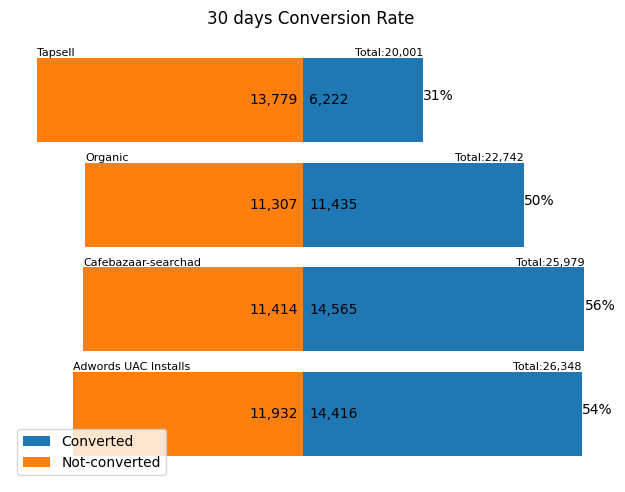

In [12]:

days_count = 30

group_by = 'network_name'

group = df_users.groupby(group_by)[group_by].agg(['size'])
df_plot = df_events[df_events['aqz_age_day']<=days_count]
df_plot = df_plot.reset_index().drop_duplicates('adid',keep='first')

group['cnv_size'] = df_plot.groupby(group_by)['adid'].size()
group['instant_ratio'] = 100.0 * group['cnv_size'] / group['size']

my_plot = group[['cnv_size']]
my_plot.columns = ['Converted']
my_plot['Not-converted'] = group['cnv_size'] - group['size']
ax = my_plot.plot(kind='barh',stacked=True,width=.8)
j = 0
plt.ylabel('')
plt.xticks([])
plt.yticks([])
plt.legend(loc=3)  # Lower left

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

for i in my_plot.index:
    print(i)
    x = my_plot['Converted'][i] / 2
    x2 = my_plot['Not-converted'][i] / 2
    y = j
    print(i,x,y)
    plt.text(300,y,"{:,}".format(int(x*2)),ha='left',va='center')
    plt.text(-300,y,"{:,}".format(int(-x2*2)),ha='right',va='center')
    plt.text(x*2,y+.42,'Total:'+"{:,}".format(group['size'][i]),ha='right',size=8)
    plt.text(x*2,y,str(int(group['instant_ratio'][i]))+'%',ha='left',size=10)
    plt.text(x2*2,y+.42,i,ha='left',size=8)
    j = j + 1
plt.tight_layout()
plt.title(str(days_count) + ' days Conversion Rate')
#plt.savefig(path+'output/'+'instant_conversion_rate_'+str(days_count),dpi=300)
plt.show()
#return group

# Data Cleaning

# Exploration